# **Highlighting outliers**

An outlier is a data point which is significantly different from the remaining data. "An outlier is an observation which deviates so much from the other observations as to arouse suspicions that it was generated by a different mechanism." [D. Hawkins. Identification of Outliers, Chapman and Hall , 1980.]

In this work, we will learn to identify outliers using boxplots and the inter-quantile range proximity rule.

According to the inter-quantile range proximity rule, a value is an outlier if it falls outside the below boundaries:

* Upper boundary = 75th quantile + (IQR * 1.5)

* Lower boundary = 25th quantile - (IQR * 1.5)

where the inter-quantile range (IQR) is given by:

* IQR = 75th quantile - 25th quantile

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# boston house dataset for the demo
from sklearn.datasets import fetch_california_housing

In [5]:
# load the the fetch california housing price data

# load the fetch california dataset from sklearn
housing = fetch_california_housing()

# create a dataframe with the independent variables
# indicated below:
# I will use only 3 of the total variables for this demo

fetch_california = pd.DataFrame(housing.data,
                      columns=housing.feature_names)[[
                          'MedInc', 'HouseAge', 'Population'
                      ]]

fetch_california.head()

,MedInc,HouseAge,Population
0,8.3252,41.0,322.0
1,8.3014,21.0,2401.0
2,7.2574,52.0,496.0
3,5.6431,52.0,558.0
4,3.8462,52.0,565.0


In the boxplot displayed below, the IQR is indicated by the box, the median is indicated by the line within the box, the top and bottom edges of the box correspond to the 75th and 25th quantile, and the whiskers mark the proximity rule boundaries as described above. Values that fall outside the whiskers are considered outliers.

Text(0.5, 1.0, 'Boxplot')

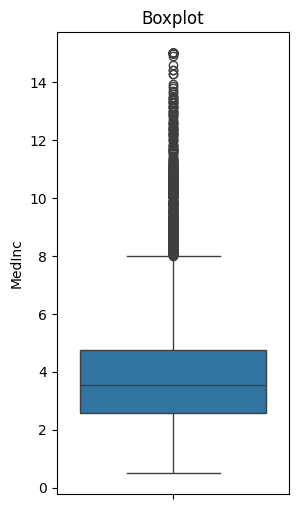

In [7]:
# boxplot
plt.figure(figsize=(3,6))
sns.boxplot(y=fetch_california['MedInc'])
plt.title('Boxplot')

Text(0.5, 1.0, 'Boxplot')

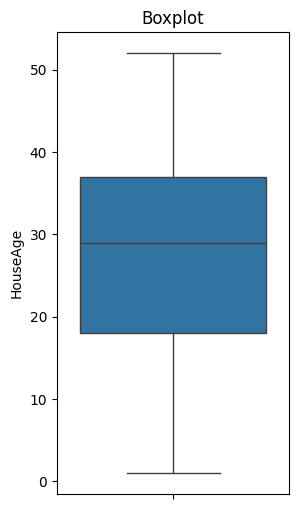

In [8]:
# boxplot
plt.figure(figsize=(3,6))
sns.boxplot(y=fetch_california['HouseAge'])
plt.title('Boxplot')

In [9]:
# not let's find in a dataframe those outliers:

# the function finds the upper and lower boundaries
# using the IQR proximity rule

# function as presented in the book

def find_boundaries(df, variable):

    # distance passed as an argument, gives us the option to
    # estimate 1.5 times or 3 times the IQR to calculate
    # the boundaries.

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * 1.5)
    upper_boundary = df[variable].quantile(0.75) + (IQR * 1.5)

    return upper_boundary, lower_boundary

In [11]:
# we find the boudaries for the variable MedInc

upper_boundary, lower_boundary = find_boundaries(fetch_california, 'MedInc')
upper_boundary, lower_boundary

(8.013024999999999, -0.7063750000000004)

In [12]:
# not let's find in a dataframe those outliers:

# the function finds the upper and lower boundaries
# using the IQR proximity rule

# alternative, also presented in the book
# passing the distance as a function argument
# to allow for versatility

def find_boundaries(df, variable, distance):

    # distance passed as an argument, gives us the option to
    # estimate 1.5 times or 3 times the IQR to calculate
    # the boundaries.

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [14]:
# we find the boudaries for the variable MedInc

upper_boundary, lower_boundary = find_boundaries(fetch_california, 'MedInc', 1.5)
upper_boundary, lower_boundary

(8.013024999999999, -0.7063750000000004)

In [15]:
# let's flag the outliers in the data set

outliers = np.where(fetch_california['MedInc'] > upper_boundary, True,
                    np.where(fetch_california['MedInc'] < lower_boundary, True, False))

In [16]:
# how many outliers did we find?
outliers.sum()

681

In [17]:
# let's print a few of them

outliers_df = fetch_california.loc[outliers, 'MedInc']
outliers_df.head()

0       8.3252
1       8.3014
131    11.6017
134     8.2049
135     8.4010
Name: MedInc, dtype: float64

In [18]:
tmp = fetch_california.loc[~outliers, 'MedInc']
tmp.shape

(19959,)